In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cycler import cycler

In [2]:
dF = pd.read_csv('data.csv')

In [3]:
dF

,V tupla (mV),T tupla (grados),R 10k (Kohms),T 10k (grados),R 100k (kOhm),T 100k (grados),T pt100 (grados),R pt100 [Ohm],T LM [C],V LM [mV],T diodo [C],V diodo[mV],T Cu [C],R Cu [Ω]
0,0.3,33.0,5.12,40.0,122.1,20,20,109,25.0,358.0,25.0,552.0,25.0,183.0
1,0.4,35.0,4.12,45.0,103.1,25,25,110,30.0,458.0,30.0,539.0,30.0,187.0
2,0.6,40.0,3.37,50.0,83.5,30,30,112,35.0,535.0,35.0,526.0,35.0,190.0
3,0.9,45.0,2.79,55.0,66.3,35,35,114,40.0,589.0,40.0,515.0,40.0,194.0
4,1.1,50.0,2.29,60.0,54.0,40,40,116,45.0,703.0,45.0,504.0,45.0,198.0
5,1.3,55.0,1.88,65.0,43.2,45,45,118,50.0,785.0,50.0,492.0,50.0,201.0
6,1.5,60.0,1.54,70.0,35.8,50,50,120,55.0,991.0,55.0,481.0,55.0,205.0
7,1.7,65.0,1.22,75.0,28.8,55,55,122,60.0,1087.0,60.0,451.0,60.0,209.0
8,2.0,70.0,1.09,80.0,23.5,60,60,124,65.0,1199.0,65.0,460.0,65.0,213.0
9,2.2,75.0,0.89,85.0,19.2,65,65,127,70.0,1295.0,70.0,448.0,70.0,217.0


In [4]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

# Set a global color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=[
    "#72B5E5",  # Celeste más apagado
    "#3A88C9",  # Azul intermedio más intenso
    "#2554A5",  # Azul profundo (cercano al azul real)
    "#5A33C9",  # Azul violáceo intenso
    "#6825A5",  # Violeta frío fuerte
    "#75189D"   # Púrpura frío vibrante con alto contraste
])

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)



## Termopar

In [5]:
V_tupla = np.array(dF['V tupla (mV)'])
T_tupla = np.array(dF['T tupla (grados)'])

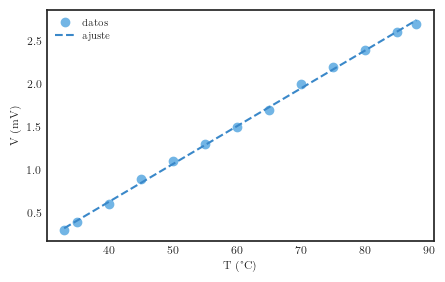

In [6]:
figure1 = plt.figure(figsize=(5, 3))

plt.plot(T_tupla, V_tupla, 'o', label = 'datos')
plt.plot(T_tupla, 0.044*T_tupla-1.13, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'V (mV)')

plt.legend()
plt.savefig('termopar.pdf', dpi=300)

## Termistor 10Kohm

In [7]:
R_10k = np.array(dF['R 10k (Kohms)'])
T_10k = np.array(dF['T 10k (grados)']) + 273

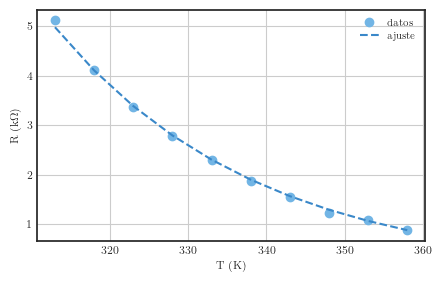

In [8]:
figure2 = plt.figure(figsize=(5, 3))

plt.plot(T_10k, R_10k, 'o', label = 'datos')
plt.plot(T_10k, 867213*np.exp(-0.038556*T_10k), '--', label = 'ajuste')

plt.xlabel(r'T (K)')
plt.ylabel(r'R (k$\Omega$)')

plt.grid()
plt.legend()
plt.savefig('termistor10k.pdf', dpi=300)

## Termistor 100k

In [9]:
R_10k = np.array(dF['R 100k (kOhm)'])
T_10k = np.array(dF['T 100k (grados)']) + 273

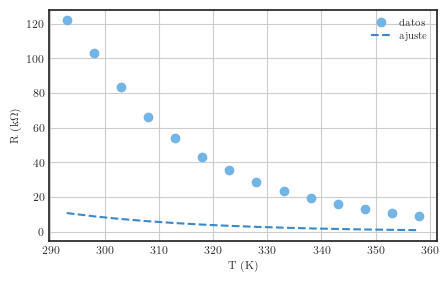

In [10]:
figure3 = plt.figure(figsize=(5, 3))

plt.plot(T_10k, R_10k, 'o', label = 'datos')
plt.plot(T_10k, 867213*np.exp(-0.038556*T_10k), '--', label = 'ajuste')

plt.xlabel(r'T (K)')
plt.ylabel(r'R (k$\Omega$)')

plt.grid()
plt.legend()
plt.savefig('termistor100k.pdf', dpi=300)

## PT 100

In [11]:
R_pt100 = np.array(dF['R pt100 [Ohm]'])
T_pt100 = np.array(dF['T pt100 (grados)'])

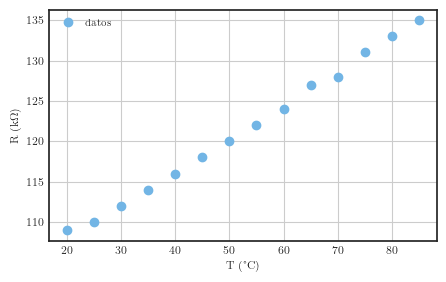

In [12]:
figure4 = plt.figure(figsize=(5, 3))

plt.plot(T_pt100, R_pt100, 'o', label = 'datos')

plt.xlabel(r'T (°C)')
plt.ylabel(r'R (k$\Omega$)')

plt.grid()
plt.legend()
plt.savefig('pt100.pdf', dpi=300)

## LM35

In [15]:
V_LM = np.array(dF['V LM [mV]'])
T_LM = np.array(dF['T LM  [C]'])

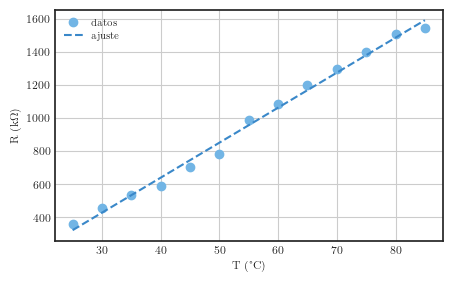

In [ ]:
figure5 = plt.figure(figsize=(5, 3))

plt.plot(T_LM, V_LM, 'o', label = 'datos')
plt.plot(T_LM, 21.16*T_LM-205.81, '--', label = 'ajuste')

plt.xlabel(r'T (°C)')
plt.ylabel(r'V (mV)')

plt.grid()
plt.legend()
plt.savefig('pt100.pdf', dpi=300)